<a id="1"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>INTRODUCTION</center></h1>

- Data contain different variable that are sub classified further:
- 1.Demographics of the Employee 2.Tenure Information 3.Historical data regarding performance
- Using these data we will going to find out whether employee will stay in the company and also will see another pattern with respect to time period of person stay in the company. There are other aspects also see in the notebook you can check in visualization part.
- Using this data HR department will find out easily what type of candidate they need to take for particular job role.

<a id="2"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>LIBRARIES</center></h1>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-employee-attrition/sample_submission.csv
/kaggle/input/predicting-employee-attrition/train_data.csv
/kaggle/input/predicting-employee-attrition/test_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline


<a id="3"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>IMPORT_DATA</center></h1>

# 2.Import Data

In [3]:
train = pd.read_csv('/kaggle/input/predicting-employee-attrition/train_data.csv')
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


<a id="4"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>DATA_PREPROCESSING</center></h1>

# 3. Data Preprocessing

In [4]:
train.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [5]:
train['Target']=np.where(train['LastWorkingDate'].isnull(),0,1)
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0


In [6]:
emp_groupby = train.groupby(['Emp_ID'])['Emp_ID','Age','Gender','City','Education_Level','Salary','Joining Designation','Designation',
                       'Quarterly Rating','Target'].tail(1)
emp_groupby

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
2,1,28,Male,C23,Master,57387,1,1,2,1
4,2,31,Male,C7,Master,67016,2,2,1,0
9,4,43,Male,C13,Master,65603,2,2,1,1
12,5,29,Male,C9,College,46368,1,1,1,1
17,6,31,Female,C11,Bachelor,78728,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...
19078,2784,34,Male,C24,College,82815,2,3,4,0
19081,2785,34,Female,C9,College,12105,1,1,1,1
19090,2786,45,Male,C19,College,35370,2,2,1,1
19096,2787,28,Female,C20,Master,69498,1,1,1,1


In [7]:
emp_groupby.reset_index(inplace = True,drop = True)
emp_groupby

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,1,1,2,1
1,2,31,Male,C7,Master,67016,2,2,1,0
2,4,43,Male,C13,Master,65603,2,2,1,1
3,5,29,Male,C9,College,46368,1,1,1,1
4,6,31,Female,C11,Bachelor,78728,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,Male,C24,College,82815,2,3,4,0
2377,2785,34,Female,C9,College,12105,1,1,1,1
2378,2786,45,Male,C19,College,35370,2,2,1,1
2379,2787,28,Female,C20,Master,69498,1,1,1,1


In [8]:
total_busi_groupby = train.groupby('Emp_ID').agg({'Total Business Value':'sum'})
total_busi_groupby

,Total Business Value
Emp_ID,
1,1715580
2,0
4,350000
5,120360
6,1265000
...,...
2784,21748820
2785,0
2786,2815090


In [9]:
total_busi_groupby.reset_index(drop = True,inplace = True)

In [10]:
final = pd.concat([total_busi_groupby,emp_groupby],axis = 1,join = 'inner')
final

,Total Business Value,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
0,1715580,1,28,Male,C23,Master,57387,1,1,2,1
1,0,2,31,Male,C7,Master,67016,2,2,1,0
2,350000,4,43,Male,C13,Master,65603,2,2,1,1
3,120360,5,29,Male,C9,College,46368,1,1,1,1
4,1265000,6,31,Female,C11,Bachelor,78728,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2376,21748820,2784,34,Male,C24,College,82815,2,3,4,0
2377,0,2785,34,Female,C9,College,12105,1,1,1,1
2378,2815090,2786,45,Male,C19,College,35370,2,2,1,1
2379,977830,2787,28,Female,C20,Master,69498,1,1,1,1


<AxesSubplot:>

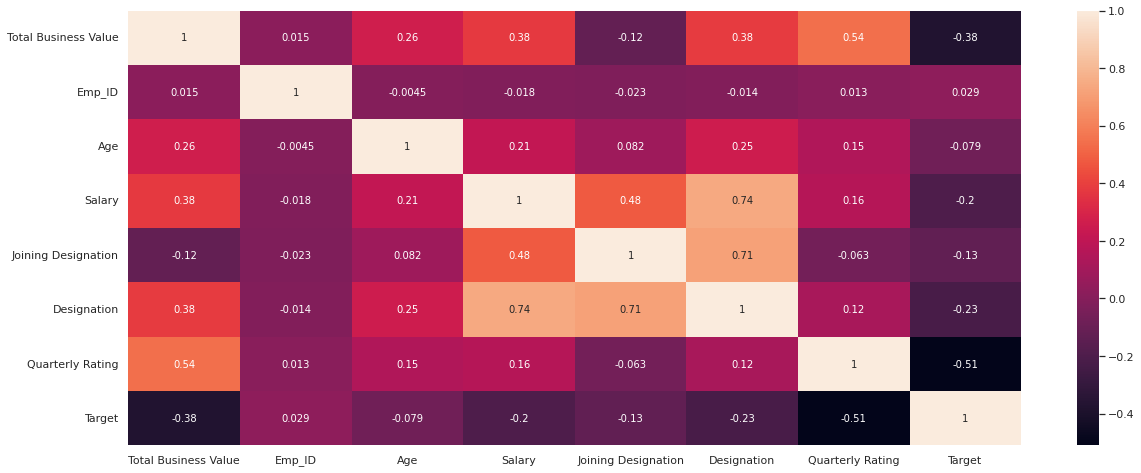

In [11]:
corr = final.corr()

plt.figure(figsize = (20,8))
sns.heatmap(corr,annot = True,cmap = 'rocket')

<a id="5"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>DATA_VISUALIZATION</center></h1>


# 4.Data Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


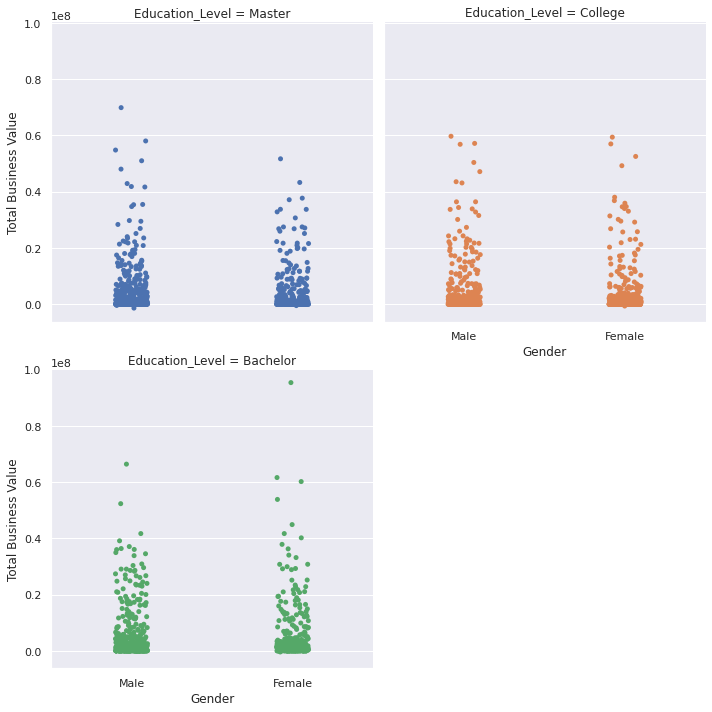

In [13]:
sns.catplot('Gender','Total Business Value',hue = 'Education_Level',data = final,col = 'Education_Level',col_wrap = 2)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


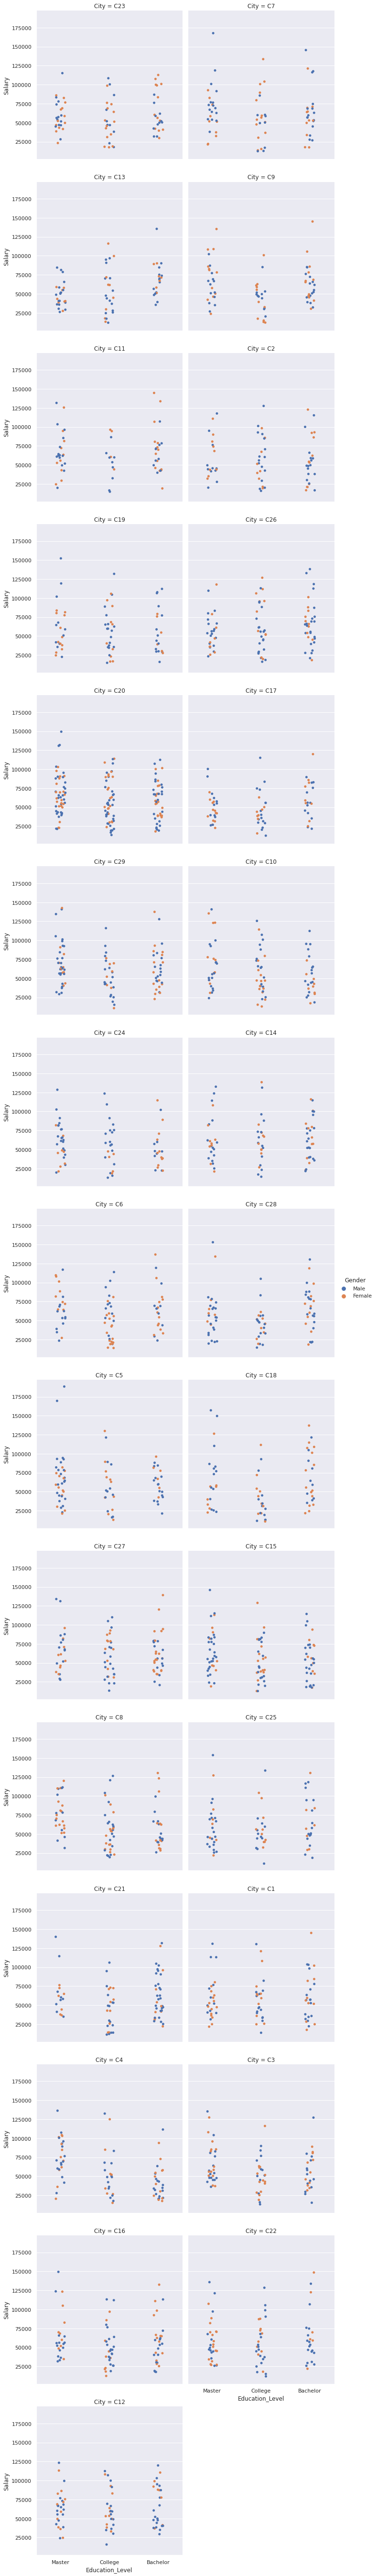

In [14]:
sns.catplot('Education_Level','Salary',data = final,hue = 'Gender',col = 'City',col_wrap = 2)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

<AxesSubplot:xlabel='Designation', ylabel='count'>

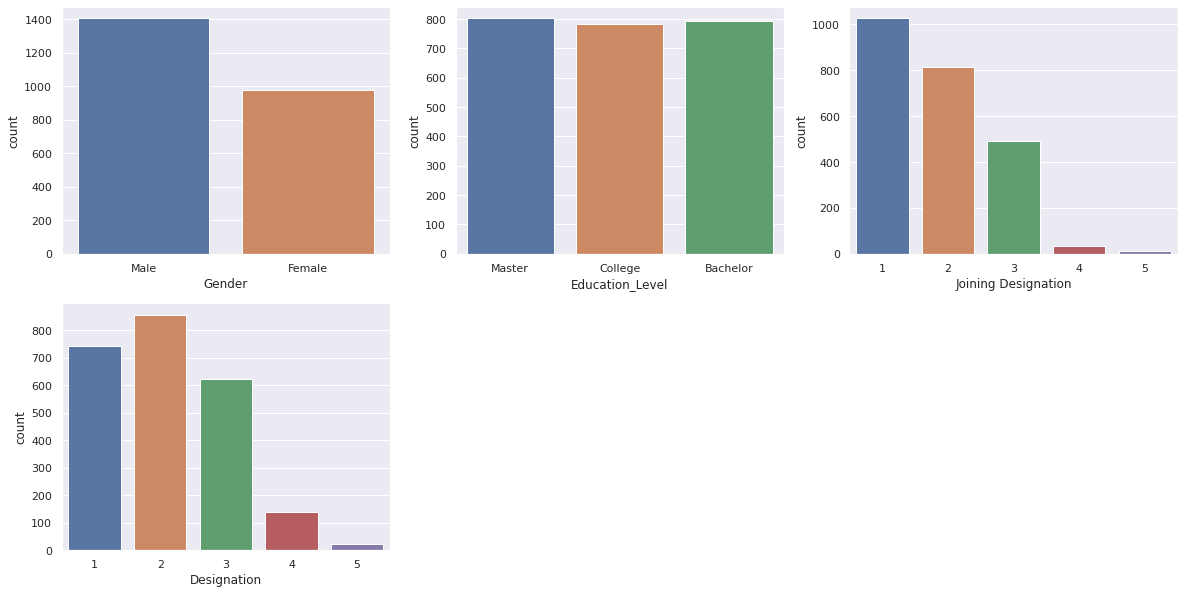

In [15]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
sns.countplot('Gender',data = final)

plt.subplot(232)
sns.countplot('Education_Level',data = final)

plt.subplot(233)
sns.countplot('Joining Designation',data = final)

plt.subplot(234)
sns.countplot('Designation',data = final)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='City', ylabel='count'>

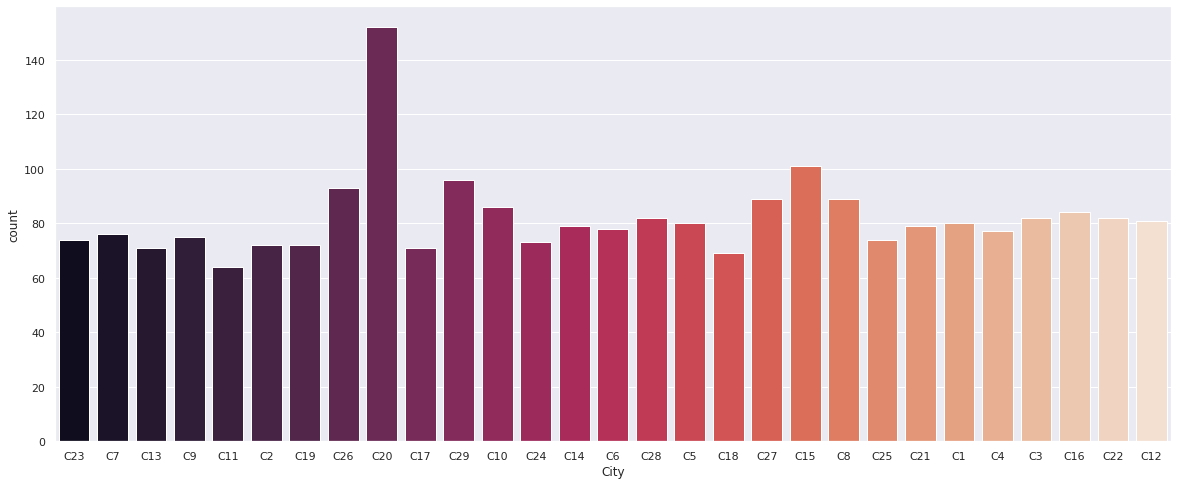

In [16]:
plt.figure(figsize = (20,8))
sns.countplot('City',data = final,palette= 'rocket')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Target', ylabel='count'>

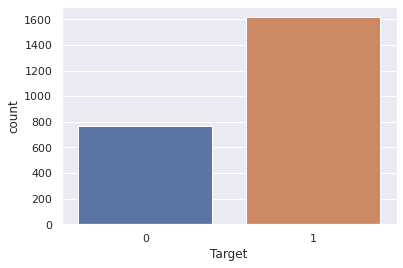

In [17]:
sns.countplot('Target',data = final)

In [19]:
final['Quarterly Rating'].unique()

array([2, 1, 4, 3])

In [20]:
final ['Gender'] = pd.get_dummies(final['Gender'],drop_first = True)
final

,Total Business Value,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
0,1715580,1,28,1,C23,Master,57387,1,1,2,1
1,0,2,31,1,C7,Master,67016,2,2,1,0
2,350000,4,43,1,C13,Master,65603,2,2,1,1
3,120360,5,29,1,C9,College,46368,1,1,1,1
4,1265000,6,31,0,C11,Bachelor,78728,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2376,21748820,2784,34,1,C24,College,82815,2,3,4,0
2377,0,2785,34,0,C9,College,12105,1,1,1,1
2378,2815090,2786,45,1,C19,College,35370,2,2,1,1
2379,977830,2787,28,0,C20,Master,69498,1,1,1,1


In [21]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

final['City'] = label.fit_transform(final['City'])

final['Education_Level'] = label.fit_transform(final['Education_Level'])

In [22]:
final.head()

,Total Business Value,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
0,1715580,1,28,1,15,2,57387,1,1,2,1
1,0,2,31,1,26,2,67016,2,2,1,0
2,350000,4,43,1,4,2,65603,2,2,1,1
3,120360,5,29,1,28,1,46368,1,1,1,1
4,1265000,6,31,0,2,0,78728,3,3,2,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Total Business Value'>

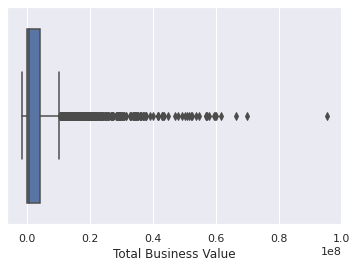

In [23]:
sns.boxplot('Total Business Value',data = final)

In [24]:
Q1 = final['Total Business Value'].quantile(0.25)
Q3 = final['Total Business Value'].quantile(0.75)
IQR = Q3 - Q1

filter = (final['Total Business Value'] >= Q1 - 1.5 * IQR) & (final['Total Business Value']<= Q3 + 1.5 *IQR)
train1 = final.loc[filter]  
print("data loss percentage {}%".format(((len(final) - len(train1))/len(final))*100))

data loss percentage 14.111717765644688%


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Salary'>

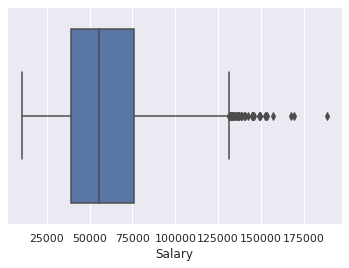

In [25]:
sns.boxplot('Salary',data = final)

In [26]:
Q1 = final['Salary'].quantile(0.25)
Q3 = final['Salary'].quantile(0.75)
IQR = Q3 - Q1

filter = (final['Salary'] >= Q1 - 1.5 * IQR) & (final['Salary']<= Q3 + 1.5 *IQR)
train2 = final.loc[filter]  
print("data loss percentage {}%".format(((len(final) - len(train2))/len(final))*100))

data loss percentage 2.015959680806384%


In [28]:
train2.shape

(2333, 11)

In [29]:
## Get the Fraud and the normal dataset 

not_stay= (train2['Target']== 0 )

stay= (train2['Target']== 1 )

In [41]:

std_x = train2.loc[:,['Total Business Value','Age','Gender','City','Education_Level','Salary','Joining Designation','Designation','Quarterly Rating']]
std_x.shape

(2333, 9)

In [42]:
y = train2.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Target, dtype: int64

In [43]:
from imblearn.under_sampling import NearMiss

# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_resample(std_x,y)

In [44]:
X_res.shape,y_res.shape

((1472, 9), (1472,))

<a id="6"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>DATA_VALIDATION</center></h1>

# 5. Data Validation

In [45]:
from sklearn.model_selection import train_test_split

#Split data into Train and test format
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.25,random_state =105)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('shape of Test:{}'.format(x_test.shape))

Shape of Training Xs:(1104, 9)
shape of Test:(368, 9)


In [ ]:
#pip install lazypredict

<a id="7"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>MODEL_BUILDING</center></h1>

# 6. Model Building

In [46]:
from lazypredict.Supervised import LazyClassifier


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)


100%|██████████| 29/29 [00:01<00:00, 14.78it/s]


In [47]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.82               0.81     0.81      0.82   
BernoulliNB                        0.82               0.81     0.81      0.82   
ExtraTreesClassifier               0.81               0.80     0.80      0.81   
LinearSVC                          0.81               0.80     0.80      0.80   
AdaBoostClassifier                 0.80               0.80     0.80      0.80   
XGBClassifier                      0.80               0.80     0.80      0.80   
LGBMClassifier                     0.80               0.80     0.80      0.80   
SGDClassifier                      0.80               0.80     0.80      0.80   
CalibratedClassifierCV             0.80               0.80     0.80      0.80   
BaggingClassifier                  0.80               0.80     0.80      0.80   
LogisticRegression          

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
score = clf.score(x_test,y_test)

In [52]:
print(score)

0.8125


<a id="8"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>CONFUSION_MATRIX</center></h1>


# 7. Confusion Matirx

In [53]:
from sklearn.metrics import confusion_matrix
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[129,  48],
       [ 21, 170]])

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79       177
           1       0.78      0.89      0.83       191

    accuracy                           0.81       368
   macro avg       0.82      0.81      0.81       368
weighted avg       0.82      0.81      0.81       368



In [75]:
test = pd.read_csv('/kaggle/input/predicting-employee-attrition/test_data.csv')

test.shape

(741, 1)

In [76]:
test_f = pd.merge(test,final,on = 'Emp_ID')
test_f

,Emp_ID,Total Business Value,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating,Target
0,394,27458220,34,0,12,2,97722,2,4,3,0
1,173,19866290,39,1,20,1,56174,1,3,3,0
2,1090,50382490,39,1,4,1,96750,2,4,2,0
3,840,17134040,40,0,27,1,88813,1,4,2,0
4,308,58024490,32,1,24,2,188418,2,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...
736,2134,59696450,40,1,21,1,116006,2,5,1,0
737,2255,36398090,40,1,17,1,133489,3,4,3,0
738,448,30318780,37,1,1,0,65389,2,4,3,0
739,1644,28842760,48,0,28,0,105513,2,4,1,0


<a id="9"></a>
<h1 style='background:#92b0ac; border:0; color:black'><center>TEST_PREDICTION</center></h1>


# 8. Prediction on Test Data

In [77]:
test_final = test_f.drop(['Emp_ID','Target'],axis = 1)
test_final.head()

,Total Business Value,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Quarterly Rating
0,27458220,34,0,12,2,97722,2,4,3
1,19866290,39,1,20,1,56174,1,3,3
2,50382490,39,1,4,1,96750,2,4,2
3,17134040,40,0,27,1,88813,1,4,2
4,58024490,32,1,24,2,188418,2,5,2


In [78]:
test_predicted = clf.predict(test_final)
test_predicted.shape

(741,)

In [79]:
submission=pd.read_csv('/kaggle/input/predicting-employee-attrition/sample_submission.csv')

submission

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0
...,...,...
736,2134,0
737,2255,0
738,448,0
739,1644,0


In [81]:
submission['Target']=test_predicted


submission.to_csv('Random_forest.csv',index=False)
